### Data analysis and a simple decision tree example using data from https://www.kaggle.com/uciml/zoo-animal-classification

### from Part-2 analysis, we know the gini index scores. Based on that we select following columns only.


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from collections import Counter
import math as math
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

Read the data file

In [2]:
zoo_df = pd.read_csv("data\Decision-Tree_Zoo-Data\zoo-animal-classification\zoo.csv")

Check if we are missing any data

In [3]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


animal_name is not useful in classification. remove it from data set

In [4]:
animal_names = zoo_df['animal_name'].to_list()
print(animal_names)
zoo_df = zoo_df.drop('animal_name', axis=1)

['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck', 'elephant', 'flamingo', 'flea', 'frog', 'frog', 'fruitbat', 'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vampire', 'vole', 'vulture', 'wallaby', 'wasp', 'wolf', 'worm', 'wren']


In [5]:
#One-of-K Encode the "legs" column data
onehot_encoder = OneHotEncoder(sparse=False, categories = "auto", dtype=np.int)
onehot_encoded = onehot_encoder.fit_transform(zoo_df["legs"].values.reshape(-1,1))

# prepare column names
legs_clm_names = list()
col_index = 0
for name in onehot_encoder.categories_[0]:
    zoo_df["legs" + str(name)] = onehot_encoded[:, col_index]
    col_index = col_index + 1
zoo_df = zoo_df.drop("legs", axis=1)

In [6]:
for column in zoo_df.columns:
    zoo_df[column] = zoo_df[column].astype("category")

In [7]:
# assumes x and y are categorical data
def calc_entropy(y_actual):
    class_counter = Counter(y_actual)
    total_count = float(len(y_actual))
    entropy = 0;
    for clas, count in class_counter.items():
        probability = count/total_count
        entropy = entropy - (probability * math.log2(probability))
    print("Entropy Value: ", entropy)
    return entropy

def calc_information_gain(input_x, y_actual):
    total_count = float(len(y_actual))
    # divide the input_x column into k partitions
    partitions = Counter(input_x)
    sum_of_partition_entropies = 0;
    print(partitions.items())
    for partition_key, count in partitions.items():
        mask = input_x == partition_key
        sum_of_partition_entropies = sum_of_partition_entropies + ((count/total_count)*calc_entropy(y_actual[mask]))
    info_gain = calc_entropy(y_actual) - sum_of_partition_entropies
    return info_gain

In [8]:
columns= list(zoo_df.columns)
columns.remove("class_type")
print(columns)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs0', 'legs2', 'legs4', 'legs5', 'legs6', 'legs8']


In [9]:
# copy X columns
X = zoo_df.loc[:, zoo_df.columns != 'class_type']
y = zoo_df['class_type']

info_gains = list()
for column_index in range(X.shape[1]):
    print(columns[column_index])
    info_gain = calc_information_gain(X[columns[column_index]], y)
    info_gains.append((columns[column_index], info_gain))

def index(tup):
    return tup[1]
info_gains.sort(key=index, reverse=True)

hair
dict_items([(1, 43), (0, 58)])
Entropy Value:  0.446481346896803
Entropy Value:  2.4549947941466774
Entropy Value:  2.390559682294039
feathers
dict_items([(0, 81), (1, 20)])
Entropy Value:  2.085599756607019
Entropy Value:  0.0
Entropy Value:  2.390559682294039
eggs
dict_items([(0, 42), (1, 59)])
Entropy Value:  0.3238144752669867
Entropy Value:  2.440717570606548
Entropy Value:  2.390559682294039
milk
dict_items([(1, 41), (0, 60)])
Entropy Value:  0.0
Entropy Value:  2.3840039346603206
Entropy Value:  2.390559682294039
airborne
dict_items([(0, 77), (1, 24)])
Entropy Value:  2.1490550563472093
Entropy Value:  1.188721875540867
Entropy Value:  2.390559682294039
aquatic
dict_items([(0, 65), (1, 36)])
Entropy Value:  1.8250158976149118
Entropy Value:  2.3189516306418954
Entropy Value:  2.390559682294039
predator
dict_items([(1, 56), (0, 45)])
Entropy Value:  2.380193616019289
Entropy Value:  2.19372298488875
Entropy Value:  2.390559682294039
toothed
dict_items([(1, 61), (0, 40)])
Ent

In [10]:
print(info_gains)

[('milk', 0.9743197211096903), ('toothed', 0.8656941534932372), ('eggs', 0.8301384483633483), ('hair', 0.7906745736101797), ('feathers', 0.717949976500291), ('backbone', 0.6761627418829197), ('breathes', 0.6144940279390552), ('legs2', 0.5699350199064221), ('legs4', 0.5354901439597965), ('tail', 0.5004604482515029), ('legs0', 0.47651785746755304), ('airborne', 0.4697026095047725), ('fins', 0.4666135671503897), ('legs6', 0.3943711445752738), ('aquatic', 0.3894874837982223), ('catsize', 0.30849034491428196), ('venomous', 0.13308962953512316), ('predator', 0.09344704054083186), ('legs8', 0.06884924179382468), ('domestic', 0.05066877984551832), ('legs5', 0.033700840045208125)]


## Split the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [12]:
# copy first N columns
num_features_to_use = 13
features = []
count = 0
for feature, score in info_gains:
    features.append(feature)
    count+=1
    if count == num_features_to_use:
        break
#print(features)
#columns = ["toothed", "tail", "backbone", "legs4", "breathes", "legs0", "aquatic", "venomous", "hair", "eggs", "feathers", "milk"]
X = zoo_df[features]
# copy Y column (class)
y = zoo_df['class_type']

In [13]:
#oversampler = SMOTE(k_neighbors=1)
oversampler = RandomOverSampler()
X, y = oversampler.fit_resample(X, y)

In [14]:
# split the data (70-30 split)
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.30, stratify = y)

Build the machine learning model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Predict the class of test data

In [17]:
y_predicted = model.predict(test_X)

How good is the model?
check accuracy

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(test_Y, y_predicted))

0.9770114942528736


Build confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
c_matrix = confusion_matrix(test_Y, y_predicted)
print(c_matrix)

[[12  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0 11  0  2  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


In [22]:
from collections import Counter

In [23]:
print(Counter(test_Y))

Counter({5: 13, 2: 13, 3: 13, 1: 12, 4: 12, 7: 12, 6: 12})


In [24]:
print(Counter(y_predicted))

Counter({5: 15, 2: 13, 1: 12, 4: 12, 7: 12, 6: 12, 3: 11})


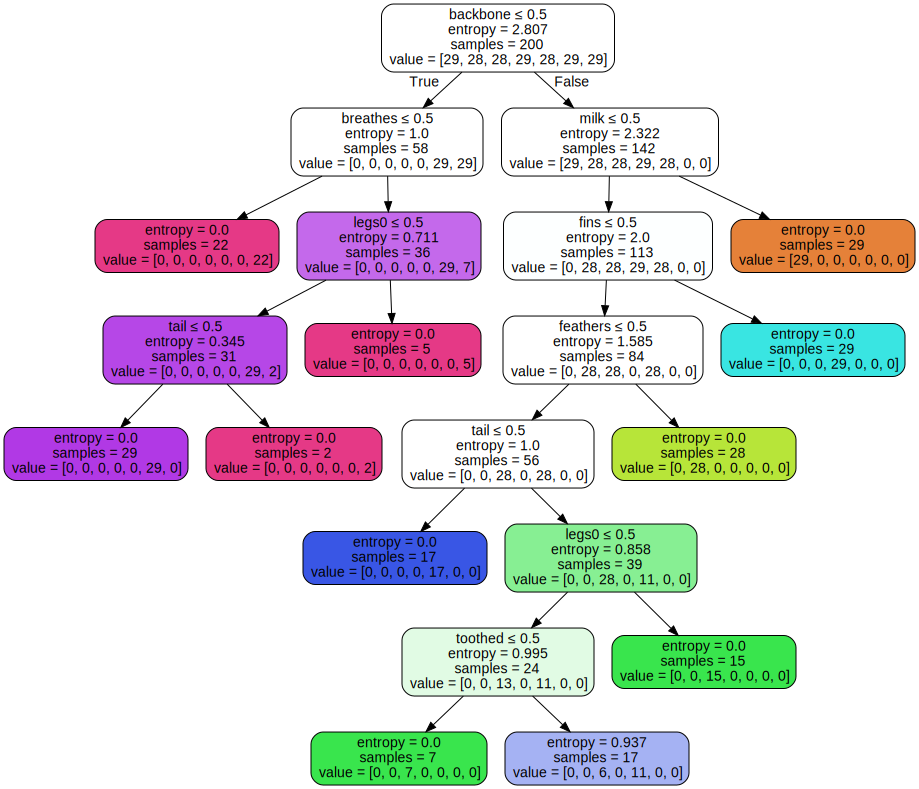

In [25]:
# plot the tree
# for graphing the tree
import graphviz as gv
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded = True, special_characters = True
                               , feature_names = features)
graph = gv.Source(dot_data)
graph